## Import libraries 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd
import numpy as np
from config import (dta_dir,
                    derived_dir,
                    covar_dict, 
                    covar_order)

from figure_functions import (map_cluster_numbers, 
                              process_plot_data,
                              forest_plot,
                              forest_plot_row,
                              forest_plot_grid,
                             )

## Import and preprocess results 

In [3]:
dta = pd.read_csv(dta_dir + 'llc_0028_all_mlr_complete_results.csv', index_col=0)

In [4]:
dta['[0.025'] = [float(v.split(' ')[0][1:])for v in dta.CI.values]
dta['0.975]'] = [float(v.split(' ')[-1][:-1]) for v in dta.CI.values]

In [5]:
dta['covar'] = [v + '_' + str(dta.index.values[i]) for i,v in enumerate(dta.variable.values)]

In [6]:
dta['covar'] = dta.covar.map(covar_dict)

## All categories

### Reorder clusters 

In [7]:
df = dta

symptoms = pd.read_csv(derived_dir + 'llc_0028_complete_c_lca_4class_all_prev_data_v2_processed.csv', 
                       index_col=0).T

df = map_cluster_numbers(symptoms, df)

## Plot 

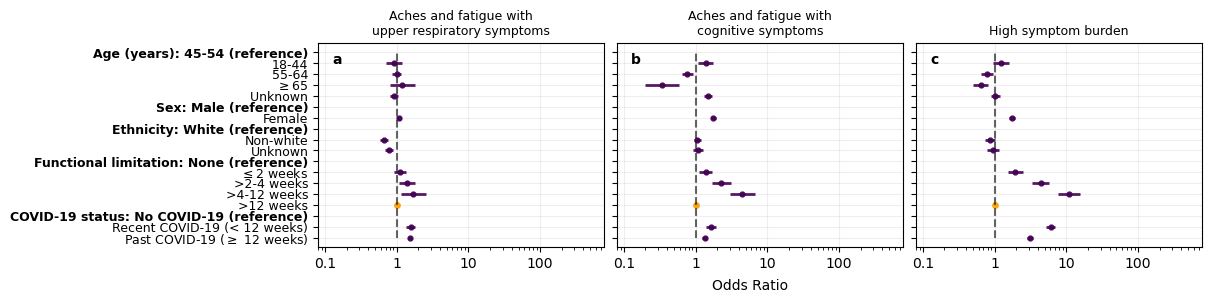

In [8]:
forest_plot_grid([df], rowtitles = '',
                figtitle = 'lca_mnlogit_all',
                all_categories=True)